In [1]:
#Mounting the drive to link with the data
import os
from google.colab import drive
drive.mount('/content/gdrive')
print(os.listdir("/content/gdrive/My Drive/Thesis Earthquake Data/"))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
['EarthquakeDataR.csv', 'output.html', 'EarthquakeDataImp.csv', 'EarthquakeDataTime.csv', 'earthquake.csv', 'EarthquakeDataArima.csv', 'data.csv']


In [0]:
#Libraries used for implementing Random Forest.
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as snss
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.inspection import plot_partial_dependence

In [0]:
#Importing the pre-processed data to save time with pandas.
EarthquakeDataImp = pd.read_csv('/content/gdrive/My Drive/Thesis Earthquake Data/EarthquakeDataImp.csv')

In [32]:
#Removing the columns showing high correlation after Boruta by creating correlation matrix.
EarthquakeDataImp = EarthquakeDataImp.drop(['Unnamed: 0','EQID','T0.035S','Mo (dyne.cm)','Fault Rupture Width (km)','Dip (deg)','Depth to Top Of Fault Rupture Model'],axis=1)
EarthquakeDataImp

,Earthquake Magnitude,Strike (deg),Rake Angle (deg),Mechanism Based on Rake Angle,P-plunge (deg),P-trend (deg),T-plunge (deg),T-trend (deg),Fault Rupture Length for Calculation of Ry (km),Fault Rupture Area (km^2),T0.036S,CRjb.4,CRjb.5,Hypocenter_Depth_(KM)
0,6.0,268.0,160.0,0.0,2.9,316.30,24.60,225.00,16.2,68.1,0.211880,0.00,0.00,6.00
1,6.0,268.0,160.0,0.0,2.9,316.29,24.62,224.96,15.3,120.0,0.063570,1.14,1.14,6.00
2,5.8,196.2,0.0,0.0,0.0,151.20,0.00,61.20,8.9,74.3,0.041890,0.00,0.00,10.00
3,5.0,205.5,0.0,0.0,0.0,160.50,0.00,70.50,2.2,8.4,0.019835,0.00,23.58,16.00
4,5.5,35.0,0.0,0.0,0.0,350.00,0.00,260.00,4.4,25.0,0.126340,0.00,0.00,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21523,3.8,134.0,-178.0,0.0,11.3,357.90,8.50,89.60,1.1,1.0,0.000358,4.58,4.58,7.59
21524,3.8,134.0,-178.0,0.0,11.3,357.90,8.50,89.60,1.1,1.0,0.000544,4.58,4.58,7.59
21525,3.8,134.0,-178.0,0.0,11.3,357.90,8.50,89.60,1.1,1.0,0.000349,4.58,4.58,7.59
21526,3.8,134.0,-178.0,0.0,11.3,357.90,8.50,89.60,1.1,1.0,0.000270,4.58,4.58,7.59


,Earthquake Magnitude,Strike (deg),Rake Angle (deg),Mechanism Based on Rake Angle,P-plunge (deg),P-trend (deg),T-plunge (deg),T-trend (deg),Fault Rupture Length for Calculation of Ry (km),Fault Rupture Area (km^2),T0.036S,CRjb.4,CRjb.5,Hypocenter_Depth_(KM)
Earthquake Magnitude,1.000000,-0.196454,0.229762,0.308301,-0.117532,0.200394,0.410344,0.000219,0.640929,0.499102,0.331217,-0.052388,-0.181206,0.165765
Strike (deg),-0.196454,1.000000,-0.036627,-0.268093,-0.086143,0.042363,-0.329137,0.285066,-0.066088,-0.060633,-0.079425,0.009657,0.092373,0.071885
Rake Angle (deg),0.229762,-0.036627,1.000000,0.205563,-0.312043,0.140428,0.443098,0.001942,0.098236,0.111424,0.075854,-0.091721,0.017894,0.201785
Mechanism Based on Rake Angle,0.308301,-0.268093,0.205563,1.000000,0.255855,0.126212,0.616848,-0.112189,0.190131,0.219525,0.123992,-0.010619,-0.091069,0.124158
P-plunge (deg),-0.117532,-0.086143,-0.312043,0.255855,1.000000,0.074358,-0.123360,-0.116541,-0.127361,-0.099981,0.002329,0.108213,0.025425,0.005428
P-trend (deg),0.200394,0.042363,0.140428,0.126212,0.074358,1.000000,0.107622,-0.213683,0.029246,0.008155,0.018464,0.020940,0.043650,0.091890
T-plunge (deg),0.410344,-0.329137,0.443098,0.616848,-0.123360,0.107622,1.000000,-0.126899,0.177944,0.171446,0.135979,-0.037385,-0.078404,0.086207
T-trend (deg),0.000219,0.285066,0.001942,-0.112189,-0.116541,-0.213683,-0.126899,1.000000,0.053552,0.020579,-0.002950,0.012259,0.052679,0.067731
Fault Rupture Length for Calculation of Ry (km),0.640929,-0.066088,0.098236,0.190131,-0.127361,0.029246,0.177944,0.053552,1.000000,0.945910,0.170676,-0.068379,-0.112923,-0.012046
Fault Rupture Area (km^2),0.499102,-0.060633,0.111424,0.219525,-0.099981,0.008155,0.171446,0.020579,0.945910,1.000000,0.125506,-0.055249,-0.083781,-0.005181


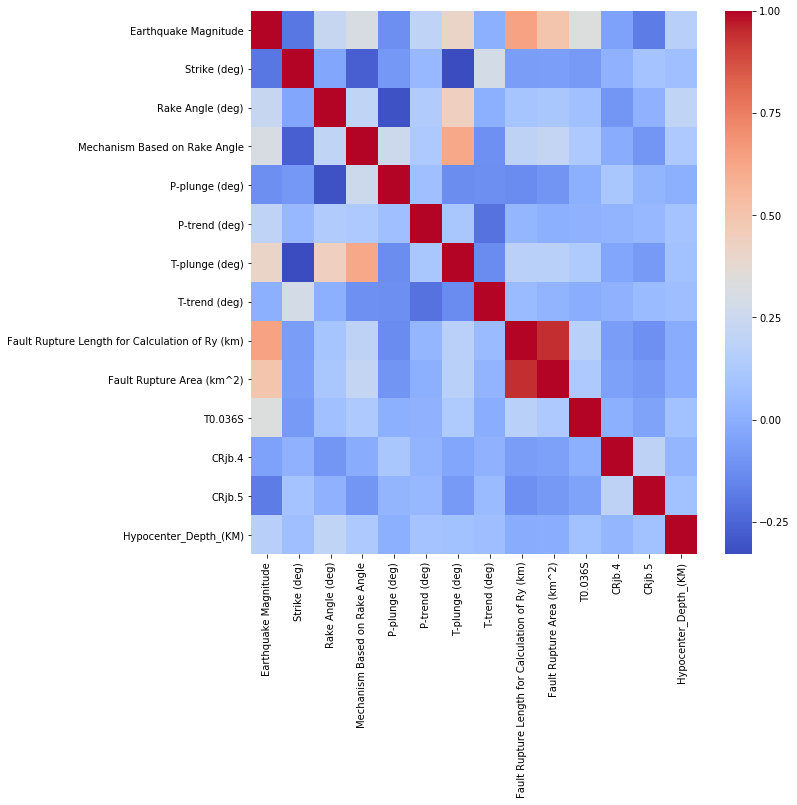

In [33]:
#Correlation matrix after Boruta for checking high correlation.
plt.figure(figsize=(10,10))
sns.heatmap(EarthquakeDataImp.corr(),cmap='coolwarm');
EarthquakeDataImp.corr()

In [0]:
#Scaling the features with min max to make all the features in similar numbers for fast execution of algorithm
scaler = preprocessing.MinMaxScaler()
EarthquakeDataImpscaled = scaler.fit_transform(EarthquakeDataImp)

In [36]:
#Creating a scaled dataframe
EarthquakeDataImpscaled= pd.DataFrame(EarthquakeDataImpscaled)
EarthquakeDataImpscaled
#type(EarthquakeDataImpscaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.613035,0.744444,0.635514,0.0,0.032475,0.878855,0.282434,0.627503,0.051871,0.005333,0.058828,0.000000,0.000000,0.073845
1,0.613035,0.744444,0.635514,0.0,0.032475,0.878827,0.282664,0.627391,0.048917,0.009404,0.017650,0.057986,0.028529,0.073845
2,0.572301,0.545000,0.336449,0.0,0.000000,0.420117,0.000000,0.168846,0.027905,0.005820,0.011631,0.000000,0.000000,0.123240
3,0.409369,0.570833,0.336449,0.0,0.000000,0.445957,0.000000,0.194887,0.005909,0.000651,0.005507,0.000000,0.590090,0.197333
4,0.511202,0.097222,0.336449,0.0,0.000000,0.972492,0.000000,0.725506,0.013132,0.001953,0.035078,0.000000,0.000000,0.123240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21523,0.164969,0.372222,0.003738,0.0,0.126540,0.994443,0.097589,0.248369,0.002298,0.000071,0.000099,0.232960,0.114615,0.093480
21524,0.164969,0.372222,0.003738,0.0,0.126540,0.994443,0.097589,0.248369,0.002298,0.000071,0.000151,0.232960,0.114615,0.093480
21525,0.164969,0.372222,0.003738,0.0,0.126540,0.994443,0.097589,0.248369,0.002298,0.000071,0.000097,0.232960,0.114615,0.093480
21526,0.164969,0.372222,0.003738,0.0,0.126540,0.994443,0.097589,0.248369,0.002298,0.000071,0.000075,0.232960,0.114615,0.093480


In [0]:
#Mapping the columns
EarthquakeDataImpscaled = EarthquakeDataImpscaled.rename(columns={ 0: 'Earthquake Magnitude', 1: 'Strike (deg)', 2: 'Rake Angle (deg)', 3: 'Mechanism Based on Rake Angle', 4: 'P-plunge (deg)', 5: 'P-trend (deg)', 6: ' T-plunge (deg)', 7: 'T-trend (deg)	'
                                                                  , 8: 'Fault Rupture Length for Calculation of Ry (km)', 9: 'Fault Rupture Area (km^2)', 10: 'T0.036S'
                                                                  , 11: 'CRjb.4', 12: 'CRjb.5', 13: 'Hypocenter_Depth_(KM)'})

For normalising the data first checking it with density plots

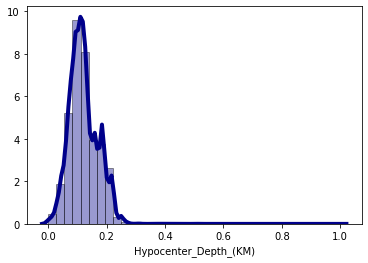

In [0]:
#Checking the skweness of the data.
sns.distplot(EarthquakeDataImpscaled['Hypocenter_Depth_(KM)'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

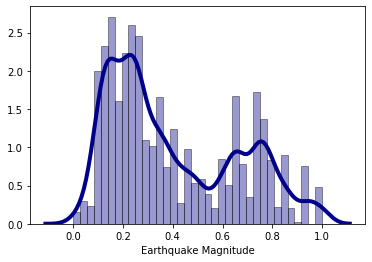

In [0]:
snss.distplot(EarthquakeDataImpscaled['Earthquake Magnitude'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

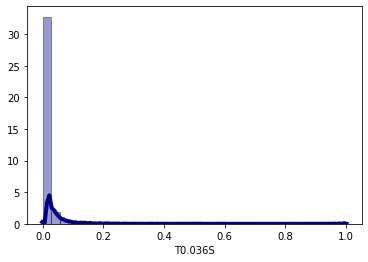

In [0]:
snss.distplot(EarthquakeDataImpscaled['T0.036S'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

As the Data is positively skewed the techniques like log and sqrt were performed. After using log transformation some of the values gave -infinity, hence squareroot was chosen.

In [0]:
#Squareroot transformation was performed for positivley skewed data.
EarthquakeDataImpscaledsqrt = np.sqrt(EarthquakeDataImpscaled)

In [0]:
EarthquakeDataImpscaledsqrt

,Earthquake Magnitude,Strike (deg),Rake Angle (deg),Mechanism Based on Rake Angle,P-plunge (deg),P-trend (deg),T-plunge (deg),T-trend (deg)\t,Fault Rupture Length for Calculation of Ry (km),Fault Rupture Area (km^2),T0.036S,CRjb.4,CRjb.5,Hypocenter_Depth_(KM)
0,0.782965,0.862812,0.797191,0.0,0.180208,0.937473,0.531445,0.792151,0.227753,0.073030,0.242544,0.000000,0.000000,0.271745
1,0.782965,0.862812,0.797191,0.0,0.180208,0.937458,0.531661,0.792080,0.221171,0.096974,0.132853,0.240802,0.168904,0.271745
2,0.756506,0.738241,0.580042,0.0,0.000000,0.648164,0.000000,0.410909,0.167049,0.076287,0.107845,0.000000,0.000000,0.351056
3,0.639819,0.755535,0.580042,0.0,0.000000,0.667800,0.000000,0.441460,0.076873,0.025514,0.074209,0.000000,0.768173,0.444221
4,0.714984,0.311805,0.580042,0.0,0.000000,0.986150,0.000000,0.851766,0.114595,0.044192,0.187291,0.000000,0.000000,0.351056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21523,0.406164,0.610100,0.061142,0.0,0.355724,0.997218,0.312392,0.498366,0.047938,0.008402,0.009962,0.482660,0.338548,0.305745
21524,0.406164,0.610100,0.061142,0.0,0.355724,0.997218,0.312392,0.498366,0.047938,0.008402,0.012285,0.482660,0.338548,0.305745
21525,0.406164,0.610100,0.061142,0.0,0.355724,0.997218,0.312392,0.498366,0.047938,0.008402,0.009833,0.482660,0.338548,0.305745
21526,0.406164,0.610100,0.061142,0.0,0.355724,0.997218,0.312392,0.498366,0.047938,0.008402,0.008651,0.482660,0.338548,0.305745


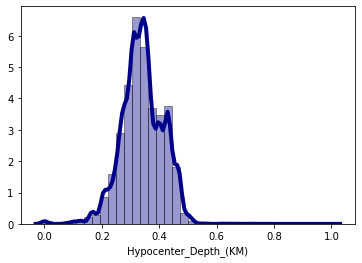

In [0]:
#Checking after applying square root transformation.
sns.distplot(EarthquakeDataImpscaledsqrt['Hypocenter_Depth_(KM)'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

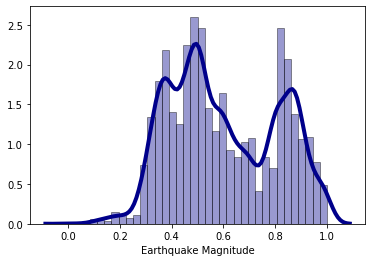

In [0]:
sns.distplot(EarthquakeDataImpscaledsqrt['Earthquake Magnitude'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

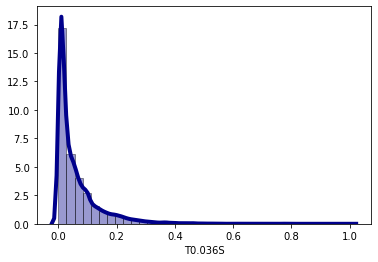

In [0]:
sns.distplot(EarthquakeDataImpscaledsqrt['T0.036S'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [0]:
# Splitting the data into train and test.
X = EarthquakeDataImpscaledsqrt.iloc[:, 0:13]
y = EarthquakeDataImpscaledsqrt.iloc[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [0]:
#Applying Random Forest Regressor with Simple Split
regressor = RandomForestRegressor(n_estimators=40, random_state=0)
regressor.fit(X_train, y_train)
x_pred = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

In [0]:
#Unscaling the data after applying the model
scale=preprocessing.MinMaxScaler()
scale.min_,scale.scale_=scaler.min_[13], scaler.scale_[13]
y_pred_unscaled = scale.inverse_transform(y_pred.reshape(-1,1))
y_test_unscaled = scale.inverse_transform(y_test.values.reshape(-1,1))
X_test_unscaled = scale.inverse_transform(X_test.values.reshape(-1,1))

In [42]:
##Random Forest##
#R squared value
#train_score = r2_score(X_train,y_pred)
test_score = r2_score(y_test_unscaled, y_pred_unscaled)
#train_score
print("The R squared value is:")
print(test_score)


The R squared value is:
0.9672190121314415


In [0]:
#Checking the scale of dependent variable.
print(max(y_pred_unscaled))
print(min(y_pred_unscaled))

[45.08746832]
[0.02]


In [0]:
##For Random Forest##
#Calculating the metrics with simple split
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_unscaled, y_pred_unscaled))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_unscaled, y_pred_unscaled))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_unscaled, y_pred_unscaled)))

Mean Absolute Error: 0.058962061539790625
Mean Squared Error: 1.0948519209722982
Root Mean Squared Error: 1.0463517195342578


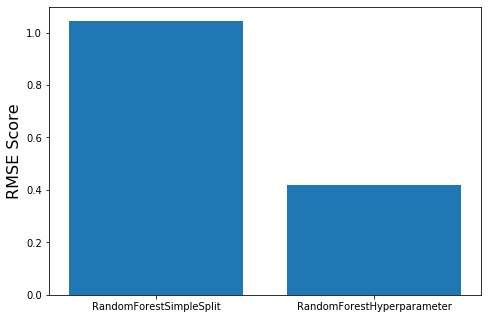

In [0]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['RandomForestSimpleSplit', 'RandomForestHyperparameter']
RMSE = [1.046,0.42]
ax.bar(Models,RMSE)
plt.ylabel('RMSE Score', fontsize=16)
plt.show()

In [0]:
from matplotlib import pyplot as plt
!pip install pdpbox
import pdpbox
from pdpbox import pdp, info_plots

     |████████████████████████████████| 57.7MB 62kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=950ca106aa3781264bab89440ec968ec09d5be3bbd611333f983932b8e6884f4
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


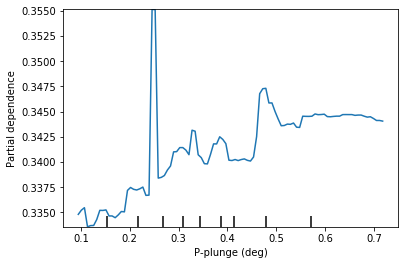

In [46]:
#Partial dependence plot for finding the most contributing variables.
features = [4]
plot_partial_dependence(regressor, X, features,grid_resolution=100,)


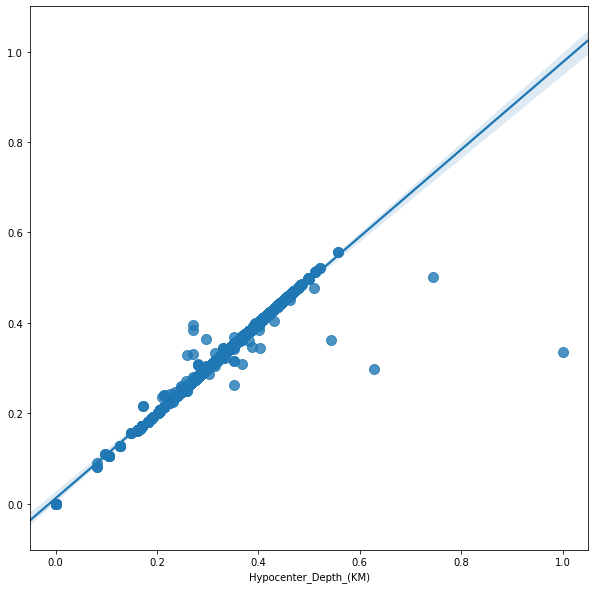

In [0]:
#plotting the line of best fit graph.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))         
sns.regplot(y_test, y_pred, fit_reg=True, scatter_kws={"s": 100})

In [0]:
#Hyperparameter Tuning by RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np
from math import sqrt

#defining the parameters
n_estimators=[50,100,150,200]
max_features=['auto','sqrt','log2']
max_depth=[10,20,30,40,50]
max_depth.append
min_samples_split = [2,5,10,15,20]
min_samples_leaf = [1,2,5,10,15]


grid_param = { 
    'n_estimators' : n_estimators,
    'max_features' : max_features,
     'max_depth' : max_depth,
     'min_samples_split' : min_samples_split,
     'min_samples_leaf' : min_samples_leaf 

}

X_train,X_test,y_train,y_test=train_test_split(EarthquakeDataImpscaledsqrt.iloc[:,0:13],EarthquakeDataImpscaledsqrt['Hypocenter_Depth_(KM)'],test_size=0.2,random_state=123)
#Implementing Random Search hyper parameter tuning.
from sklearn.model_selection import RandomizedSearchCV
RFR = RandomForestRegressor(random_state=1)
kfold = KFold(n_splits=5, random_state=7)
RFR_random = RandomizedSearchCV(estimator=RFR,param_distributions=grid_param,n_iter=500,cv=kfold,verbose=2,random_state=42,n_jobs=-1)
RFR_random.fit(X_train,y_train)
print(RFR_random.best_params_)
expected_y  = y_test
y_pred = RFR_random.predict(X_test)
#Printing the metrics
print("The best parameters are :")
print(RFR_random.best_params_)
scale=preprocessing.MinMaxScaler()
scale.min_,scale.scale_=scaler.min_[13], scaler.scale_[13]
y_pred_unscaled = scale.inverse_transform(y_pred.reshape(-1,1))
y_test_unscaled = scale.inverse_transform(y_test.values.reshape(-1,1))
print("The RMSE is :")
print(np.sqrt(mean_squared_error(y_test_unscaled,y_pred_unscaled)))
print("The R2 is :") 
print(r2_score(y_test_unscaled, y_pred_unscaled))
print("The MAE is :")
print(mean_absolute_error(y_test_unscaled,y_pred_unscaled))


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 47.1min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 64.9min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 82.3min finished


{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50}
The best parameters are :
{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50}
The RMSE is :
0.4265647083790141
The R2 is :
0.9947099526401153
The MAE is :
0.04622461986320378


In [0]:
#finding the range for RMSE
print(max(y_pred_unscaled))
print(min(y_pred_unscaled))

[44.86746015]
[0.02]
